# PREDICCIÓN CHURN POR NODO

## CONTENIDO

* Carga de librerías
 * Configuraciones ambiente de trabajo
* 

## Carga de librerías

In [2]:
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error,  mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt,ExponentialSmoothing
import statsmodels.api as sm
import seaborn as sns

In [3]:
import sys
print(sys.version)

3.9.0 (default, Nov 15 2020, 08:30:55) [MSC v.1916 64 bit (AMD64)]


### Configuraciones ambiente de trabajo

In [7]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [8]:
TablaMarClient= pd.read_csv(f'CR_Nodos2.csv',sep=';')

In [9]:
TablaMarClient.head(2)

,NODO,MARCACIONES,CLIENTES,CONTACT,MES,ANIO,DIA,FECHA
0,VE2,139,286,48.600,9,2020,1,2020-09-01
1,CQ59,3,15,20.000,9,2020,1,2020-09-01


In [10]:
len(TablaMarClient)

186849

In [11]:
#carga de los datos
TablaChurn=pd.read_csv(f'N3_Tomas_Rojas.csv',sep=';')

In [12]:
len(TablaChurn)

180221

In [13]:
TablaChurn.head(3)

,E_distrito,Nodo,Fecha,Value,anio,mes,dia,fecha2
0,ACACIAS NORTE,2IA,1/1/2020,-6.000,2020.000,1.000,1.000,2020-01-01
1,ACACIAS NORTE,3IA,1/1/2020,-2.000,2020.000,1.000,1.000,2020-01-01
2,ACACIAS NORTE,AMI,1/1/2020,-8.000,2020.000,1.000,1.000,2020-01-01


In [14]:
TablaFinal=TablaChurn.merge(TablaMarClient,left_on=['Nodo','fecha2'],right_on=['NODO','FECHA'], how='left')

In [15]:
TablaFinal[TablaFinal['NODO'].isnull()].head(10)

,E_distrito,Nodo,Fecha,Value,anio,mes,dia,fecha2,NODO,MARCACIONES,CLIENTES,CONTACT,MES,ANIO,DIA,FECHA
0,ACACIAS NORTE,2IA,1/1/2020,-6.000,2020.000,1.000,1.000,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ACACIAS NORTE,3IA,1/1/2020,-2.000,2020.000,1.000,1.000,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACACIAS NORTE,AMI,1/1/2020,-8.000,2020.000,1.000,1.000,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACACIAS NORTE,FLS,1/1/2020,-11.000,2020.000,1.000,1.000,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACACIAS NORTE,IAT,1/1/2020,-14.000,2020.000,1.000,1.000,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ACACIAS NORTE,IIA,1/1/2020,1.000,2020.000,1.000,1.000,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ACACIAS NORTE,INB,1/1/2020,-7.000,2020.000,1.000,1.000,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ACACIAS NORTE,IND,1/1/2020,0.000,2020.000,1.000,1.000,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ACACIAS NORTE,INY,1/1/2020,-2.000,2020.000,1.000,1.000,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ACACIAS NORTE,LBY,1/1/2020,0.000,2020.000,1.000,1.000,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
Reg_Churn_NoenContact=TablaFinal[TablaFinal['NODO'].isnull()]
Reg_Churn_NoenContact.to_csv('Reg_Churn_NoenContact.csv')

In [17]:
len(TablaFinal)

180221

In [18]:
TablaFinal.drop(columns=['Fecha','anio','mes','dia','ANIO','MES','DIA','FECHA','NODO'], inplace=True)

In [19]:
TablaFinal.sample(10)

,E_distrito,Nodo,Value,fecha2,MARCACIONES,CLIENTES,CONTACT
15504,MEDELLIN SURORIENTAL,EC4,-17.000,2020-07-01,NaN,NaN,NaN
5755,JAVERIANA,2B5021,-3.000,2020-03-01,NaN,NaN,NaN
42528,TOCANCIPA,AOP,0.000,2021-01-01,6.000,39.000,15.380
87321,MEDELLIN SUR FTTH,MGMD03,3.000,2021-04-01,1.000,1.000,100.000
115292,CHIQUINQUIRA DTH,HPAUNA,-5.000,2021-06-01,4.000,90.000,4.444
20742,PEPE SIERRA,4C6012,-2.000,2020-09-01,21.000,114.000,18.420
60373,VITERBO,VT06,0.000,2021-02-01,NaN,NaN,NaN
70765,MEDELLIN NOROCCIDENTAL,RMN2D,0.000,2021-03-01,9.000,67.000,13.430
29719,BARRANQUILLA 1 DISTRITO 4,CIE13D,-12.000,2021-01-01,58.000,184.000,31.520
24477,HAYUELOS,FC2,-11.000,2020-11-01,94.000,571.000,16.460


In [20]:
# colocar la fecha como index
TablaFinal.set_index('fecha2',inplace=True)

In [21]:
TablaFinal.index=pd.to_datetime(TablaFinal.index)

In [22]:
TablaFinal['MARCACIONES'].fillna(0,inplace=True)

#### Identificación y corrección de positivos

In [23]:
TablaFinal['pos']=np.where(TablaFinal['Value']>0,1,0)

In [24]:
TablaFinal[TablaFinal['pos']==1].sample(5)

,E_distrito,Nodo,Value,MARCACIONES,CLIENTES,CONTACT,pos
fecha2,,,,,,,
2021-04-01,MAGDALENA 6,UVN,6.000,30.000,234.000,12.820,1
2021-07-01,MEDELLIN SURORIENTAL,HH2,3.000,5.000,50.000,10.000,1
2021-01-01,BARRANQUILLA 2 DISTRITO 4,N9H,4.000,29.000,65.000,44.610,1
2021-08-01,ENGATIVA,BG1,2.000,36.000,169.000,21.300,1
2021-03-01,COMPARTIR,UMS2,3.000,0.000,NaN,NaN,1


In [25]:
#num reg con positivos
TablaFinal['pos'].value_counts()/len(TablaFinal)

0   0.928
1   0.072
Name: pos, dtype: float64

In [26]:
TablaFinal[TablaFinal['pos']==1]['Nodo'].nunique()

8357

In [27]:
#Reemplazar positivos por cero
TablaFinal['Value']=np.where(TablaFinal['Value']>0,0,TablaFinal['Value'])

## Construcción de Maestro Nodos

In [28]:
maestroNodo=TablaFinal[['Nodo','E_distrito', 'regional']]

In [29]:
# sorting by first name
maestroNodo.sort_index(ascending=True, inplace = True)
 
# dropping ALL duplicate values
maestroNodo.drop_duplicates(subset =["Nodo"], keep = 'last', inplace = True)

In [30]:
maestroNodo.head(3)

,Nodo,E_distrito
fecha2,,
2020-04-01,APW,ATAHUALPA
2020-04-01,PODM01,PEPE SIERRA
2020-08-01,4B4022,PEPE SIERRA


In [31]:
maestroNodo[maestroNodo['Nodo']=='0C1']

,Nodo,E_distrito
fecha2,,
2021-09-01,0C1,CALI NORTE DISTRITO 4


##  Separación Entrenamiento y testing

In [32]:
fechaMaxima=max(TablaFinal.index)
fechaMaxima

Timestamp('2021-09-01 00:00:00')

In [33]:
TablaFinal.index.unique()[-4]

Timestamp('2021-06-01 00:00:00')

In [34]:
fechaTrain=TablaFinal.index.unique()[-4]
fechaTest=TablaFinal.index.unique()[-3]

In [35]:
print (fechaTrain,fechaTest)

2021-06-01 00:00:00 2021-07-01 00:00:00


## Seleccion de Nodos
* Nodos con información en los últimos 3 meses
* Nodos con más de 7 registros (por entrenamiento y pruebas)

In [36]:
# Nodos con información en los últimos 3 meses
Resumen=TablaFinal.reset_index()[['fecha2','Nodo']].groupby('Nodo').agg(['max','count'])

In [37]:
Resumen.head(2)

fecha2      
            max count
Nodo                 
01J  2021-09-01     9
01S  2021-09-01    21

In [38]:
Resumen.columns = Resumen.columns.droplevel(0)

In [39]:
Resumen['max'].value_counts()

2021-09-01    18465
2021-01-01       88
2021-03-01       20
2021-04-01       16
2021-05-01       11
2021-02-01        8
2020-04-01        2
2020-09-01        1
2020-08-01        1
Name: max, dtype: int64

In [40]:
Resumen['sel']=np.where(Resumen['max']<=fechaTest,'sinInfoReciente','nodoValido')

In [41]:
Resumen['sel'].value_counts()

nodoValido         18465
sinInfoReciente      147
Name: sel, dtype: int64

In [42]:
# Nodos con más de 7 registros (por entrenamiento y pruebas)

In [43]:
Resumen['count'].value_counts()

9     13600
21     2302
1       862
2       452
3       391
6       249
4       219
7       174
5       171
8        98
14       18
15       17
11       14
13       12
10        9
20        8
16        7
12        4
17        4
18        1
Name: count, dtype: int64

In [44]:
Resumen['sel']=np.where(Resumen['sel']=='nodoValido', np.where(Resumen['count']<7,'sinRegSuf','nodoValido'),Resumen['sel'])

In [45]:
Resumen['sel'].value_counts()

nodoValido         16264
sinRegSuf           2201
sinInfoReciente      147
Name: sel, dtype: int64

In [46]:
def pieChart(col):
    A = col.value_counts()
    indices = A.index
    plt.pie(A, labels=indices, autopct="%0.1f %%")
    plt.axis("equal")
    plt.show()    

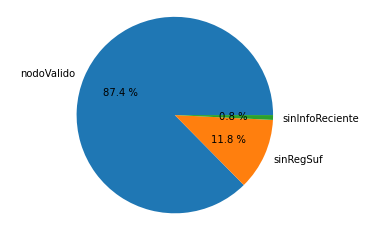

In [47]:
pieChart(Resumen['sel'])

In [48]:
Resumen.head()

,max,count,sel
Nodo,,,
01J,2021-09-01,9,nodoValido
01S,2021-09-01,21,nodoValido
02J,2021-09-01,9,nodoValido
02S,2021-09-01,21,nodoValido
03J,2021-09-01,9,nodoValido


In [49]:
TablaFinal=TablaFinal.merge(Resumen['sel'], left_on='Nodo', right_index=True,how='left')

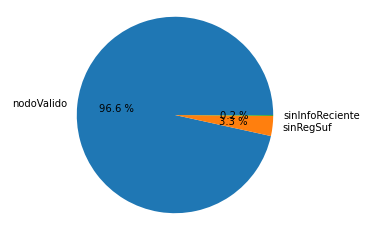

In [50]:
pieChart(TablaFinal['sel'])

In [51]:
TablaFinal=TablaFinal[TablaFinal['sel']=='nodoValido']

In [52]:
TablaTrain=TablaFinal[TablaFinal.index <= fechaTrain]
TablaTest=TablaFinal[TablaFinal.index >= fechaTest]

### Indices Entrenamiento

In [2]:
pd.date_range(TablaTrain.index.max(), periods = 4, freq ='MS', name='FECHA')[1:]

NameError: name 'pd' is not defined

In [53]:
ind = pd.date_range(TablaTrain.index.max(), periods = 4, freq ='MS', name='FECHA')[1:]
ind

DatetimeIndex(['2021-07-01', '2021-08-01', '2021-09-01'], dtype='datetime64[ns]', name='FECHA', freq='MS')

In [54]:
TablaFinal.index.max()

Timestamp('2021-09-01 00:00:00')

## Predicciones

In [94]:
numeroNodos=10000

In [56]:
final = pd.DataFrame()
finalErrores = {}
grouped =TablaTrain[['Nodo','Value','MARCACIONES']].groupby('Nodo')
groupedTest =TablaTest[['Nodo','Value','MARCACIONES']].groupby('Nodo')
groupedFinal=TablaFinal[['Nodo','Value','MARCACIONES']].groupby('Nodo')

In [64]:
temp=groupedTest[['Value']].count()

In [66]:
temp.head(2)

,Value
Nodo,
01J,3
01S,3


In [67]:
temp[temp['Value']==2]

,Value
Nodo,
NFI304,2


In [68]:
TablaTrain[TablaTrain['Nodo']=='NFI304']

,E_distrito,Nodo,Value,MARCACIONES,CLIENTES,CONTACT,pos,sel
fecha2,,,,,,,,
2021-01-01,20 DE JULIO,NFI304,0.000,0.000,NaN,NaN,0,nodoValido
2021-02-01,20 DE JULIO,NFI304,0.000,0.000,NaN,NaN,0,nodoValido
2021-03-01,20 DE JULIO,NFI304,0.000,0.000,NaN,NaN,0,nodoValido
2021-04-01,20 DE JULIO,NFI304,0.000,0.000,NaN,NaN,0,nodoValido
2021-05-01,20 DE JULIO,NFI304,0.000,0.000,NaN,NaN,0,nodoValido
2021-06-01,20 DE JULIO,NFI304,0.000,0.000,NaN,NaN,0,nodoValido


In [69]:
TablaTest[TablaTest['Nodo']=='NFI304']

,E_distrito,Nodo,Value,MARCACIONES,CLIENTES,CONTACT,pos,sel
fecha2,,,,,,,,
2021-08-01,20 DE JULIO,NFI304,0.000,0.000,NaN,NaN,0,nodoValido
2021-09-01,20 DE JULIO,NFI304,0.000,0.000,NaN,NaN,0,nodoValido


In [70]:
temp2=groupedTest.get_group('NFI304')

In [75]:
temp2['Value']

fecha2
2021-08-01   0.000
2021-09-01   0.000
Name: Value, dtype: float64

In [80]:
forecast['pred']

FECHA
2021-07-01   -0.318
2021-08-01   -0.397
2021-09-01    0.000
Freq: MS, Name: pred, dtype: float64

In [81]:
temp2['pred2']=forecast['pred']

In [83]:
temp2['pred2']

fecha2
2021-08-01   -0.397
2021-09-01    0.000
Name: pred2, dtype: float64

In [806]:
group = grouped.get_group('01J')

In [809]:
group['Value'].values

array([ 0.,  0.,  0.,  0., -1., -2.])

In [815]:
model=auto_arima([-5.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0., 0.,  0.,  0.,  0., -1., -2.],trace=False)
#model.fit(group['Value'])  
#forecast=pd.DataFrame(model.predict(n_periods = 3),index=ind)

In [817]:
model=auto_arima([-5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-1,-2],trace=False)

In [78]:
metodos=['ARIMA','ES','HOLT','ES_ajTend','ARIMAX','ARIMAX2']

In [95]:
#i=2000*len(metodos)
i=0
for g in grouped.groups:
    #print(g)
    if i>=numeroNodos*len(metodos):
    #if i<2000*len(metodos):
        continue
    if i/len(metodos)%10==0:
        print(i/len(metodos))    
    dicNodo={} 
    dicAuxMetodo={}
    group = grouped.get_group(g) 
    groupTest = groupedTest.get_group(g) 
    for metodo in metodos:
        #print(g,metodo)
        if metodo== 'ARIMA':
            model=auto_arima(group['Value'],trace=False)
            model.fit(group['Value'])  
            forecast=pd.DataFrame(model.predict(n_periods = 3),index=ind)
        elif metodo== 'ES':
            model = SimpleExpSmoothing(group['Value'])
            model=model.fit(smoothing_level=.5)
            forecast=pd.DataFrame(model.forecast(3),index=ind)
        elif metodo== 'HOLT':
            model = Holt(group['Value']) 
            model = model.fit(optimized=True)
            forecast=pd.DataFrame(model.forecast(3),index=ind)
        elif metodo== 'ES_ajTend':
            model = ExponentialSmoothing(group['Value'],trend='add', seasonal=None, damped=True)
            model= model.fit()
            forecast=pd.DataFrame(model.forecast(3),index=ind)
        elif metodo=='ARIMAX':            
            model=sm.tsa.statespace.SARIMAX(group['Value'],order=(1, 1, 1),exog=group['MARCACIONES'])
            model=model.fit()
            num_start=len(group['Value'])
            forecast=pd.DataFrame(model.predict(start=num_start,end=num_start+2,exog=groupTest['MARCACIONES'],dynamic=True),index=ind)
        elif metodo=='ARIMAX2':
            model=auto_arima(group['Value'],trace=False,exogenous=group['MARCACIONES'].values.reshape(-1,1))
            forecast= pd.DataFrame(model.predict(n_periods=3,exogenous=groupTest['MARCACIONES'].values.reshape(-1,1)),index=ind)
        forecast.columns = ['pred']  
        forecast['Nodo']=g
        forecast['Metodo']=metodo
        if i==0:
            final=forecast
        else:
            final=final.append(forecast)     
        
        
        if len(tempTest['Value'])==3:
            #print(1)
            RMSE=mean_squared_error(groupTest['Value'],forecast['pred'], squared=False)
            MAPE=mean_absolute_percentage_error(groupTest['Value'],forecast['pred'])
        else :
            #print(2)
            tempTest=groupTest.copy()
            tempTest['pred2']=forecast['pred']    
            RMSE=mean_squared_error(tempTest['Value'].values,tempTest['pred2'].values, squared=False)
            MAPE=mean_absolute_percentage_error(tempTest['Value'].values,tempTest['pred2'].values) 
        # Errores
        ## Medicion varios errores, seleccionar el que mejor se ajuste
        #RMSE=mean_squared_error(tempTest['Value'].values,tempTest['pred2'].values, squared=False)
        #MAPE=mean_absolute_percentage_error(tempTest['Value'].values,tempTest['pred2'].values)    
        #RMSE=mean_squared_error(groupTest['Value'],forecast['pred'], squared=False)
        #MAPE=mean_absolute_percentage_error(groupTest['Value'],forecast['pred'])    
        dicNodo[metodo]=RMSE  
        i=i+1
    finalErrores[g]=dicNodo
    

2000.0
2010.0


KeyboardInterrupt: 

* Velocidad de procesamiento:  200 Nodos x Minuto

In [753]:
final[final['Metodo']=='ARIMAX2'].head(10)

,pred,Nodo,Metodo
FECHA,,,
2021-07-01,-0.318,01J,ARIMAX2
2021-08-01,-0.397,01J,ARIMAX2
2021-09-01,0.000,01J,ARIMAX2
2021-07-01,-3.694,01S,ARIMAX2
2021-08-01,-3.510,01S,ARIMAX2
2021-09-01,-3.027,01S,ARIMAX2
2021-07-01,-0.000,02J,ARIMAX2
2021-08-01,-0.000,02J,ARIMAX2
2021-09-01,0.000,02J,ARIMAX2


In [754]:
final.isnull().sum()

pred      0
Nodo      0
Metodo    0
dtype: int64

* No tiene nullos

## Selección mejor método por Nodo

In [755]:
metodos

['ARIMA', 'ES', 'HOLT', 'ES_ajTend', 'ARIMAX', 'ARIMAX2']

In [756]:
dfFinalErrores=pd.DataFrame.from_dict(finalErrores,orient='index')
dfFinalErrores.head(10)

,ARIMA,ES,HOLT,ES_ajTend,ARIMAX,ARIMAX2
01J,1.761,1.250,2.708,2.693,1.778,1.776
01S,4.396,3.886,4.447,4.394,4.891,3.052
02J,1.732,1.732,1.732,1.732,1.732,1.732
02S,5.235,5.683,4.924,5.200,5.753,6.681
03J,1.772,1.728,10.197,7.464,7.506,1.996
04J,1.732,1.500,1.818,1.803,1.907,1.803
05J,2.544,4.499,8.678,7.635,6.635,4.490
06J,2.363,1.344,1.155,0.954,6.186,3.164
07J,0.705,1.248,1.514,1.433,0.640,0.668
09J,2.082,2.054,2.237,2.233,1.974,1.975


In [757]:
minError=list(dfFinalErrores.min(axis=1).values)
minError[:10]

[1.2499151844992582,
 3.0521461561038983,
 1.732046462126798,
 4.924032984496986,
 1.7275610710933966,
 1.5003666580814592,
 2.5440562537456235,
 0.9541010323927027,
 0.6396623912794924,
 1.973761222295397]

In [1]:
modeloSeleccionado=[np.nan]*len(dfFinalErrores)
i=0
for indx,row in dfFinalErrores.iterrows():
    auxRow=list(row.values)
    auxInd=auxRow.index(minError[i])
    modeloSeleccionado[i]=metodos[auxInd]
    #print(auxRow)
    i=i+1

NameError: name 'np' is not defined

In [759]:
modeloSeleccionado[:10]

['ES',
 'ARIMAX2',
 'ARIMAX2',
 'HOLT',
 'ES',
 'ES',
 'ARIMA',
 'ES_ajTend',
 'ARIMAX',
 'ARIMAX']

In [760]:
dfFinalErrores['seleccion']=modeloSeleccionado

In [761]:
dfFinalErrores['errorMin']=minError

In [762]:
dfFinalErrores.head(10)

,ARIMA,ES,HOLT,ES_ajTend,ARIMAX,ARIMAX2,seleccion,errorMin
01J,1.761,1.250,2.708,2.693,1.778,1.776,ES,1.250
01S,4.396,3.886,4.447,4.394,4.891,3.052,ARIMAX2,3.052
02J,1.732,1.732,1.732,1.732,1.732,1.732,ARIMAX2,1.732
02S,5.235,5.683,4.924,5.200,5.753,6.681,HOLT,4.924
03J,1.772,1.728,10.197,7.464,7.506,1.996,ES,1.728
04J,1.732,1.500,1.818,1.803,1.907,1.803,ES,1.500
05J,2.544,4.499,8.678,7.635,6.635,4.490,ARIMA,2.544
06J,2.363,1.344,1.155,0.954,6.186,3.164,ES_ajTend,0.954
07J,0.705,1.248,1.514,1.433,0.640,0.668,ARIMAX,0.640
09J,2.082,2.054,2.237,2.233,1.974,1.975,ARIMAX,1.974


In [763]:
dfFinalErrores['seleccion'].value_counts()

ARIMA        304
ES           199
ARIMAX       144
ARIMAX2      133
HOLT         120
ES_ajTend    101
Name: seleccion, dtype: int64

## Predicción Final

In [764]:
ind_P = pd.date_range(fechaMaxima, periods = 4, freq ='MS', name='FECHA')[1:]
ind_P

DatetimeIndex(['2021-10-01', '2021-11-01', '2021-12-01'], dtype='datetime64[ns]', name='FECHA', freq='MS')

In [765]:
finalPrediccionesFuturas = pd.DataFrame()
groupedPred =TablaFinal[['Nodo','Value','MARCACIONES']].groupby('Nodo')

In [766]:
p=[1,2,3,4,5,6]
#np.tile(p,3)
p[-3:]
#p.reshape(-1,1)

[4, 5, 6]

In [767]:
i=0
for g in groupedPred.groups:
    if i>numeroNodos:
        continue
    if i%10==0:
        print(i)    
    group = groupedPred.get_group(g)        
    mejorMetodo=dfFinalErrores.loc[g,'seleccion']
    #print(mejorMetodo)
    #metodo=dicMetodos[g][mejorMetodo]
    #forecast=model.predict(group['Value'])
    if mejorMetodo== 'ARIMA':
        model=auto_arima(group['Value'],trace=False)
        model.fit(group['Value'])  
        forecast=pd.DataFrame(model.predict(n_periods = 3),index=ind_P)
    elif mejorMetodo== 'ES':
        model = SimpleExpSmoothing(group['Value'])
        model=model.fit(smoothing_level=.5)
        forecast=pd.DataFrame(model.forecast(3),index=ind_P)
    elif mejorMetodo== 'HOLT':
        model = Holt(group['Value']) 
        model = model.fit(optimized=True)
        forecast=pd.DataFrame(model.forecast(3),index=ind_P)
    elif mejorMetodo== 'ES_ajTend':
        model = ExponentialSmoothing(group['Value'],trend='add', seasonal=None, damped=True)
        model= model.fit()
        forecast=pd.DataFrame(model.forecast(3),index=ind_P)
    elif mejorMetodo=='ARIMAX':        
        model=sm.tsa.statespace.SARIMAX(group['Value'],order=(1, 1, 1),exog=group['MARCACIONES'])
        model=model.fit()            
        num_start=len(group['Value'])
        forecast=pd.DataFrame(model.predict(start=num_start,end=num_start+2,exog=group['MARCACIONES'].values[-3:],dynamic=True),index=ind_P)
        #forecast=pd.DataFrame(results.predict(n_periods = 3,dynamic=True),index=ind_P)
    elif metodo=='ARIMAX2':
            model=auto_arima(group['Value'],trace=False,exogenous=group['MARCACIONES'].values.reshape(-1,1))
            forecast= pd.DataFrame(model.predict(n_periods=3,exogenous=group['MARCACIONES'].values[-3:].reshape(-1,1)),index=ind_P)
    
    forecast.columns = ['pred'] 
    forecast['Nodo']=g
    forecast['Metodo']=mejorMetodo

    if i==0:
        finalPrediccionesFuturas=forecast
    else:
        finalPrediccionesFuturas=finalPrediccionesFuturas.append(forecast) 
    i=i+1
        

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000


In [768]:
#Reemplazar positivos por cero
finalPrediccionesFuturas['pred']=np.where(finalPrediccionesFuturas['pred']>0,0,finalPrediccionesFuturas['pred'])

*  Velocidad de procesamiento 650 por minuto

In [769]:
finalPrediccionesFuturas.sample(10)

,pred,Nodo,Metodo
FECHA,,,
2021-11-01,-1.923,20T,ARIMA
2021-12-01,-17.444,12D,ARIMA
2021-11-01,-9.668,2C4011,ES
2021-12-01,-1.479,1A6013,ARIMAX2
2021-10-01,-2.105,2A1012,HOLT
2021-12-01,-2.316,1A3013,ARIMAX2
2021-11-01,-3.305,28P,ES
2021-11-01,-10.544,2AE1,HOLT
2021-12-01,-0.000,1PO,ARIMAX2


In [770]:
resultadoFinal=finalPrediccionesFuturas.reset_index().merge(maestroNodo,left_on='Nodo',right_on='Nodo',how='left')
resultadoFinal.head(5)

,FECHA,pred,Nodo,Metodo,E_distrito
0,2021-10-01,-1.906,01J,ES,CORDOBA SUCRE DISTRITO 3
1,2021-11-01,-1.906,01J,ES,CORDOBA SUCRE DISTRITO 3
2,2021-12-01,-1.906,01J,ES,CORDOBA SUCRE DISTRITO 3
3,2021-10-01,-5.125,01S,ARIMAX2,GAITANA
4,2021-11-01,-5.461,01S,ARIMAX2,GAITANA


In [771]:
resultadoFinal.to_csv('resultadoPrediciones.csv')

## Visualizar Resultado Nodo

In [772]:
def visualNodo(nodo):
    print(finalErrores[nodo])
    dfNodo_real=TablaFinal[TablaFinal['Nodo']==nodo][['Value']]
    dfNodo=final[final['Nodo']==nodo]
    dfNodo= pd.pivot_table(dfNodo.reset_index(), index='FECHA', columns='Metodo', values='pred')    
    dfNodo_real=dfNodo_real.merge(dfNodo,left_index=True, right_index=True, how='left')
    dfPrediciciones=finalPrediccionesFuturas[finalPrediccionesFuturas['Nodo']==nodo]
    metodoSel=dfPrediciciones['Metodo'].unique()[0]
    dfPrediciciones.rename(columns={'pred':'pred_'+metodoSel},inplace=True)   
    dfNodo_real.merge(dfPrediciciones[['pred_'+metodoSel]],left_index=True, right_index=True,how='outer').plot()

{'ARIMA': 4.396469142839345, 'ES': 3.885508778873608, 'HOLT': 4.446972344203709, 'ES_ajTend': 4.393707471967025, 'ARIMAX': 4.890938144376631, 'ARIMAX2': 3.0521461561038983}


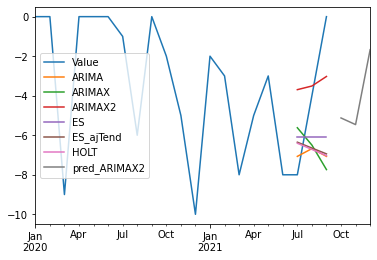

In [773]:
visualNodo('01S')

## Descripción del Resultado

In [774]:
finalPrediccionesFuturas['Metodo'].value_counts()/3

ARIMA       304.000
ES          199.000
ARIMAX      144.000
ARIMAX2     133.000
HOLT        120.000
ES_ajTend   101.000
Name: Metodo, dtype: float64

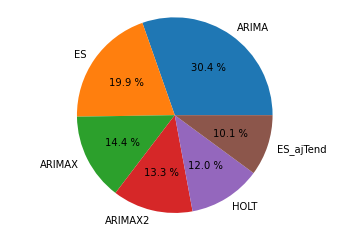

In [775]:
pieChart(finalPrediccionesFuturas['Metodo'])

<AxesSubplot:>

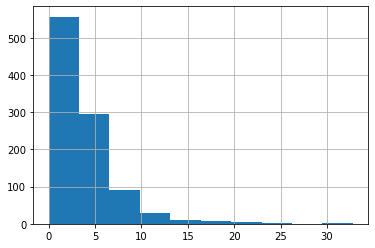

In [776]:
dfFinalErrores['errorMin'].hist()

In [777]:
maxBin=dfFinalErrores['errorMin'].max()
bins=[0,1,2,5,10,20,maxBin]

In [778]:
dfFinalErrores['binError']=pd.cut((dfFinalErrores['errorMin']),bins=np.sort(bins),right=True)

In [779]:
dfFinalErrores.head(10)

,ARIMA,ES,HOLT,ES_ajTend,ARIMAX,ARIMAX2,seleccion,errorMin,binError
01J,1.761,1.250,2.708,2.693,1.778,1.776,ES,1.250,"(1.0, 2.0]"
01S,4.396,3.886,4.447,4.394,4.891,3.052,ARIMAX2,3.052,"(2.0, 5.0]"
02J,1.732,1.732,1.732,1.732,1.732,1.732,ARIMAX2,1.732,"(1.0, 2.0]"
02S,5.235,5.683,4.924,5.200,5.753,6.681,HOLT,4.924,"(2.0, 5.0]"
03J,1.772,1.728,10.197,7.464,7.506,1.996,ES,1.728,"(1.0, 2.0]"
04J,1.732,1.500,1.818,1.803,1.907,1.803,ES,1.500,"(1.0, 2.0]"
05J,2.544,4.499,8.678,7.635,6.635,4.490,ARIMA,2.544,"(2.0, 5.0]"
06J,2.363,1.344,1.155,0.954,6.186,3.164,ES_ajTend,0.954,"(0.0, 1.0]"
07J,0.705,1.248,1.514,1.433,0.640,0.668,ARIMAX,0.640,"(0.0, 1.0]"
09J,2.082,2.054,2.237,2.233,1.974,1.975,ARIMAX,1.974,"(1.0, 2.0]"


In [780]:
dfFinalErrores['binError'].value_counts()

(2.0, 5.0]        404
(1.0, 2.0]        242
(5.0, 10.0]       189
(0.0, 1.0]         84
(10.0, 20.0]       46
(20.0, 32.777]      9
Name: binError, dtype: int64

<AxesSubplot:ylabel='binError'>

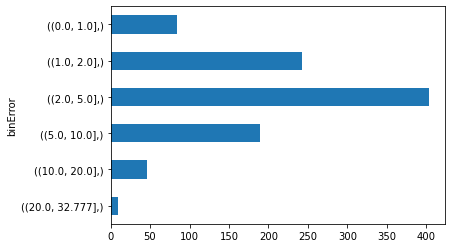

In [781]:
dfFinalErrores[['binError']].value_counts().sort_index(ascending=False).plot.barh()

#### Analisis preducciones futuras

<AxesSubplot:>

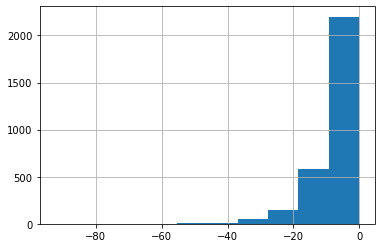

In [782]:
finalPrediccionesFuturas['pred'].hist()

In [783]:
finalPrediccionesFuturas['pred'].describe()

count   3003.000
mean      -7.005
std        7.848
min      -92.453
25%       -9.686
50%       -4.444
75%       -1.945
max        0.000
Name: pred, dtype: float64

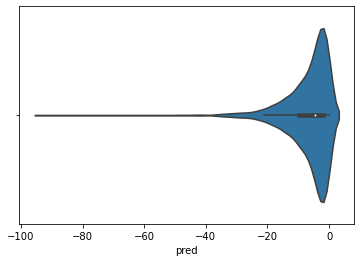

In [784]:
sns.violinplot(x=finalPrediccionesFuturas['pred']);

In [785]:
minBin=finalPrediccionesFuturas['pred'].min()
bins=[minBin,-50,-30,-20,-10,-5,0,15]
finalPrediccionesFuturas['binPred']=pd.cut((finalPrediccionesFuturas['pred']),bins=np.sort(bins),right=True)
#finalPrediccionesFuturas['binPred']=pd.cut((finalPrediccionesFuturas['pred']),bins=5,right=True)

In [786]:
finalPrediccionesFuturas['binPred'].value_counts()

(-5.0, 0.0]         1601
(-10.0, -5.0]        685
(-20.0, -10.0]       531
(-30.0, -20.0]       131
(-50.0, -30.0]        47
(-92.453, -50.0]       7
(0.0, 15.0]            0
Name: binPred, dtype: int64

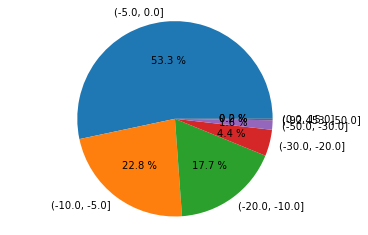

In [787]:
pieChart(finalPrediccionesFuturas['binPred'])

In [788]:
dfGraf=finalPrediccionesFuturas.reset_index()[['FECHA','pred','Nodo']]

In [789]:
dfGraf['FECHA']=dfGraf['FECHA'].astype(str)
dfGraf.head(10)

,FECHA,pred,Nodo
0,2021-10-01,-1.906,01J
1,2021-11-01,-1.906,01J
2,2021-12-01,-1.906,01J
3,2021-10-01,-5.125,01S
4,2021-11-01,-5.461,01S
5,2021-12-01,-1.673,01S
6,2021-10-01,-0.375,02J
7,2021-11-01,-0.750,02J
8,2021-12-01,0.000,02J
9,2021-10-01,-7.329,02S


<AxesSubplot:xlabel='FECHA', ylabel='pred'>

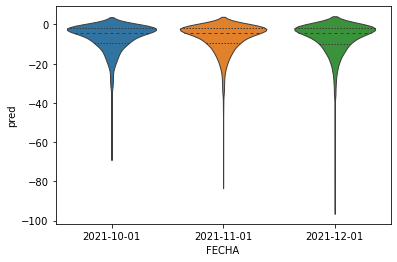

In [790]:
sns.violinplot(x='FECHA', y='pred', data=dfGraf, inner="quart", linewidth=1)

In [791]:
dfGraf=pd.pivot_table(dfGraf,index='Nodo',columns='FECHA',values='pred',aggfunc=np.sum)

In [792]:
dfGraf.describe().T

,count,mean,std,min,25%,50%,75%,max
FECHA,,,,,,,,
2021-10-01,1001.000,-6.865,7.417,-65.500,-9.467,-4.389,-2.000,0.000
2021-11-01,1001.000,-7.026,7.774,-79.611,-9.668,-4.482,-2.000,0.000
2021-12-01,1001.000,-7.124,8.333,-92.453,-9.931,-4.444,-1.778,0.000


### Resumen por nodo

In [793]:
ResPred=finalPrediccionesFuturas.groupby('Nodo').sum()

In [1]:
ResPred

NameError: name 'ResPred' is not defined

In [794]:
minBin=ResPred['pred'].min()
bins=[minBin-1,-150,-100,-50,-20,0,50]
ResPred['binPred']=pd.cut((ResPred['pred']),bins=np.sort(bins),right=True)
#ResPred['binPred']=pd.cut((ResPred['pred']),bins=5,right=True)

In [ ]:
ResPred['binPred']=pd.cut((ResPred['pred']),bins=3,right=True)

In [795]:
ResPred['binPred'].value_counts()

(-20.0, 0.0]          631
(-50.0, -20.0]        274
(-100.0, -50.0]        85
(-150.0, -100.0]        8
(-238.502, -150.0]      3
(0.0, 50.0]             0
Name: binPred, dtype: int64

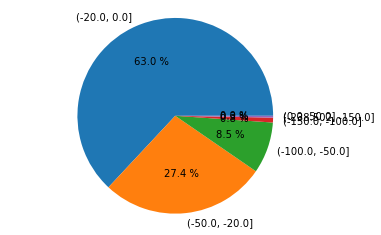

In [796]:
pieChart(ResPred['binPred'])

In [797]:
ResPred.head(2)

,pred,binPred
Nodo,,
01J,-5.719,"(-20.0, 0.0]"
01S,-12.260,"(-20.0, 0.0]"


#### Predicciones por distrito

In [798]:
pt=ResPred.merge(maestroNodo,left_index=True,right_on='Nodo',how='left')
pt.head()

,pred,binPred,Nodo,E_distrito
fecha2,,,,
2021-09-01,-5.719,"(-20.0, 0.0]",01J,CORDOBA SUCRE DISTRITO 3
2021-09-01,-12.260,"(-20.0, 0.0]",01S,GAITANA
2021-09-01,-1.125,"(-20.0, 0.0]",02J,CORDOBA SUCRE DISTRITO 4
2021-09-01,-23.010,"(-50.0, -20.0]",02S,GAITANA
2021-09-01,-6.991,"(-20.0, 0.0]",03J,CORDOBA SUCRE DISTRITO 4


In [799]:
pt=pd.pivot_table(pt,columns='binPred',index='E_distrito', fill_value=0)

In [800]:
pt

pred                   \
binPred                          (-238.502, -150.0] (-150.0, -100.0]   
E_distrito                                                             
20 DE JULIO                                   0.000            0.000   
ACACIAS NORTE                                 0.000            0.000   
ALQUERIA                                      0.000            0.000   
ANAPOIMA                                      0.000            0.000   
ANTIOQUIA NORTE 1                             0.000            0.000   
ANTIOQUIA SUROESTE 1                          0.000            0.000   
ARMENIA3                                      0.000            0.000   
ARMENIA4                                      0.000            0.000   
BARRANCABERMEJA                               0.000            0.000   
BARRANCAS                                     0.000            0.000   
BARRANQUILLA 1 DISTRITO 2                     0.000            0.000   
BARRANQUILLA 1 DISTRITO 3                     0.000            0.000   
BARRANQUILLA 1 DISTRITO 5                     0.000            0.000   
BARRANQUILLA 2 DISTRITO 1                     0.000            0.000   
BARRANQUILLA 2 DISTRITO 2                     0.000            0.000   
BARRANQUILLA 2 DISTRITO 4                  -237.502            0.000   
BELLO METROPOLITANO                           0.000            0.000   
BELLO NORTE                                   0.000            0.000   
BOLIVAR DISTRITO 1                            0.000            0.000   
BOLIVAR DISTRITO 2                            0.000            0.000   
BOLIVAR DISTRITO 3                            0.000            0.000   
BOLIVAR DISTRITO 4                            0.000            0.000   
BOLIVAR DISTRITO 5                            0.000            0.000   
BOLIVIA                                       0.000         -108.933   
BONAVISTA                                     0.000            0.000   
BRASIL                                        0.000            0.000   
CALI CENTRO DISTRITO 1                        0.000            0.000   
CALI CENTRO DISTRITO 2                        0.000            0.000   
CALI CENTRO DISTRITO 3                        0.000            0.000   
CALI CENTRO DISTRITO 4                        0.000            0.000   
CALI CENTRO DISTRITO 5                        0.000            0.000   
CALI CENTRO DISTRITO 6                        0.000            0.000   
CALI NORTE DISTRITO 1                         0.000            0.000   
CALI NORTE DISTRITO 2                         0.000            0.000   
CALI NORTE DISTRITO 3                         0.000         -120.297   
CALI NORTE DISTRITO 4                         0.000            0.000   
CALI SUR DISTRITO 1                        -153.158            0.000   
CALI SUR DISTRITO 2                           0.000            0.000   
CALI SUR DISTRITO 3                           0.000            0.000   
CALI SUR DISTRITO 4                           0.000            0.000   
CALI SUR DISTRITO 5                           0.000            0.000   
CALI SUR DISTRITO 6                           0.000            0.000   
CANDELARIA                                    0.000            0.000   
CASA BLANCA                                   0.000         -126.650   
CASANARE 3                                    0.000            0.000   
CASTILLA                                      0.000         -107.153   
CAUCA DISTRITO 4                              0.000            0.000   
CAUCA DISTRITO 5                              0.000            0.000   
CEDRITOS                                      0.000            0.000   
CESAR DISTRITO 1                              0.000            0.000   
CESAR DISTRITO 4                              0.000            0.000   
COMPARTIR                                     0.000            0.000   
CORDOBA SUCRE DISTRITO 2                      0.000            0.000   
CORDOBA SUCRE D

In [801]:
pt.sum(axis=1).sort_values()

E_distrito
BARRANQUILLA 2 DISTRITO 4          -347.206
CASA BLANCA                        -262.511
CASTILLA                           -227.431
TOLIMA DISTRITO 2                  -223.661
EL MUELLE                          -222.681
BOLIVIA                            -221.465
CALI NORTE DISTRITO 3              -209.201
CALI SUR DISTRITO 1                -199.655
DISTRITO BGA 2                     -175.812
TECHO                              -133.685
CALI NORTE DISTRITO 1              -130.979
CALI SUR DISTRITO 2                -122.452
CALI CENTRO DISTRITO 1             -114.648
FERROCARRIL                        -114.102
SANTA ISABEL                       -114.077
ANTIOQUIA NORTE 1                  -113.122
TOLIMA DISTRITO 3                  -112.702
CALI SUR DISTRITO 5                -111.197
PATIO BONITO                       -110.389
MEDELLIN NOROCCIDENTAL             -109.788
IMPERIAL                           -109.560
MILENIO                            -109.371
CALI NORTE DISTRITO 2

##  Revisión casos atípicos
* Mayores errores en los metodos

In [802]:
dfFinalErrores[dfFinalErrores['errorMin']>=20]

,ARIMA,ES,HOLT,ES_ajTend,ARIMAX,ARIMAX2,seleccion,errorMin,binError
12,26.862,25.858,21.556,23.247,29.765,30.634,HOLT,21.556,"(20.0, 32.777]"
1AP,32.572,34.257,30.639,30.244,41.287,41.495,ES_ajTend,30.244,"(20.0, 32.777]"
1BQ3B,21.354,22.620,22.648,22.620,21.573,20.512,ARIMAX2,20.512,"(20.0, 32.777]"
1MS,29.691,30.795,32.577,32.523,40.222,32.375,ARIMA,29.691,"(20.0, 32.777]"
1NV,21.794,21.882,21.838,21.947,26.582,26.790,ARIMA,21.794,"(20.0, 32.777]"
1VD,26.770,27.191,27.271,27.115,24.930,25.304,ARIMAX,24.930,"(20.0, 32.777]"
1VS,33.762,35.680,36.858,32.777,36.071,33.787,ES_ajTend,32.777,"(20.0, 32.777]"
2BQ2,23.310,23.000,21.593,21.995,23.202,23.596,HOLT,21.593,"(20.0, 32.777]"
2C0,21.965,22.623,23.836,23.759,25.002,22.424,ARIMA,21.965,"(20.0, 32.777]"


12
{'ARIMA': 26.862303202319293, 'ES': 25.85760531824659, 'HOLT': 21.5561283647001, 'ES_ajTend': 23.246616417470985, 'ARIMAX': 29.76520276790898, 'ARIMAX2': 30.63405485384329}
1AP
{'ARIMA': 32.57171574643661, 'ES': 34.25743311689504, 'HOLT': 30.638989821301543, 'ES_ajTend': 30.243813180575387, 'ARIMAX': 41.287448238571095, 'ARIMAX2': 41.495413085408146}
1BQ3B
{'ARIMA': 21.354156504062622, 'ES': 22.619657134644832, 'HOLT': 22.648309463696293, 'ES_ajTend': 22.620292916089976, 'ARIMAX': 21.573033148284193, 'ARIMAX2': 20.512139339845653}
1MS
{'ARIMA': 29.691469032928183, 'ES': 30.79477463166191, 'HOLT': 32.576827015497464, 'ES_ajTend': 32.52289007480876, 'ARIMAX': 40.22195631431521, 'ARIMAX2': 32.375176929819716}
1NV
{'ARIMA': 21.79449471770337, 'ES': 21.881668716856105, 'HOLT': 21.838451025142398, 'ES_ajTend': 21.946752852425938, 'ARIMAX': 26.582081359061572, 'ARIMAX2': 26.790067330428137}
1VD
{'ARIMA': 26.770080172896993, 'ES': 27.191279049020487, 'HOLT': 27.27082508170165, 'ES_ajTend': 

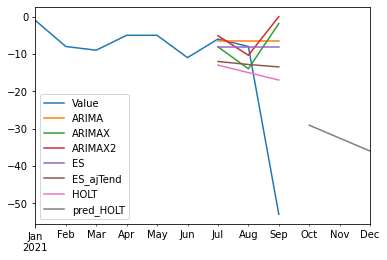

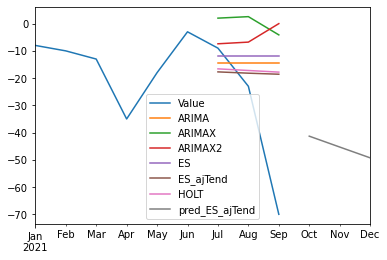

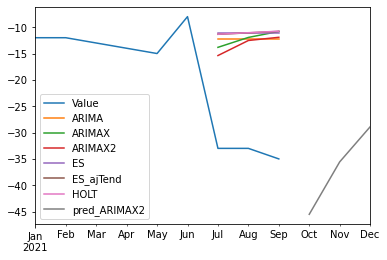

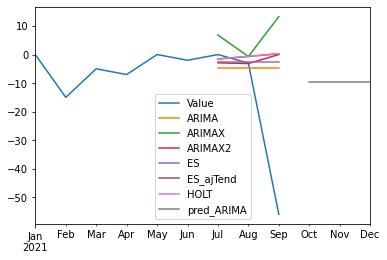

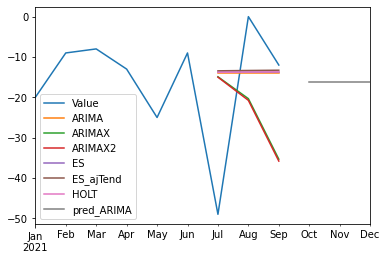

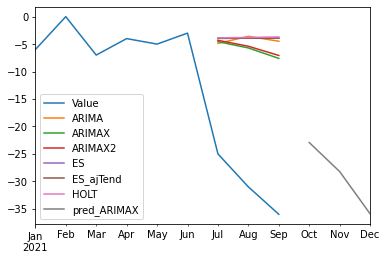

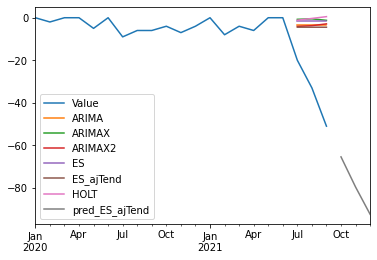

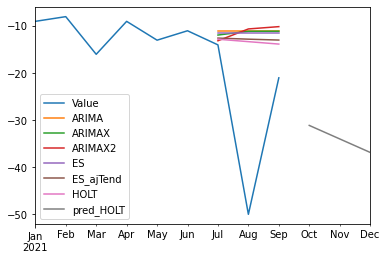

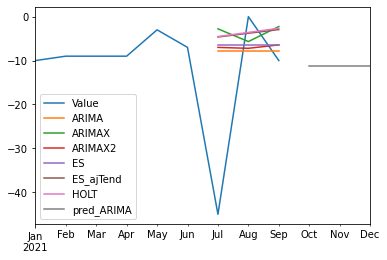

In [803]:
for key, row in dfFinalErrores[dfFinalErrores['errorMin']>=20].iterrows():
    print(key)
    visualNodo(key)

* Churn más bajos

In [804]:
finalPrediccionesFuturas[finalPrediccionesFuturas['pred']<=-50]

,pred,Nodo,Metodo,binPred
FECHA,,,,
2021-10-01,-65.500,1LO,HOLT,"(-92.453, -50.0]"
2021-11-01,-72.000,1LO,HOLT,"(-92.453, -50.0]"
2021-12-01,-78.500,1LO,HOLT,"(-92.453, -50.0]"
2021-10-01,-50.698,1VE,ARIMA,"(-92.453, -50.0]"
2021-11-01,-53.988,1VE,ARIMA,"(-92.453, -50.0]"
2021-10-01,-65.438,1VS,ES_ajTend,"(-92.453, -50.0]"
2021-11-01,-79.611,1VS,ES_ajTend,"(-92.453, -50.0]"
2021-12-01,-92.453,1VS,ES_ajTend,NaN


12B1
{'ARIMA': 14.032699906527856, 'ES': 41.38549432108378, 'HOLT': 71.29116932879268, 'ES_ajTend': 70.42904095351362, 'ARIMAX': 157.55471066633373, 'ARIMAX2': 44.95041970324738}
12E
{'ARIMA': 18.577914008006626, 'ES': 15.077062815059557, 'HOLT': 9.352473043977502, 'ES_ajTend': 9.452759554694337, 'ARIMAX': 18.69674642876359, 'ARIMAX2': 16.37391533077701}
14
{'ARIMA': 7.047458170621991, 'ES': 7.039573781740344, 'HOLT': 6.999528140812678, 'ES_ajTend': 7.156561784815942, 'ARIMAX': 14.982072693507567, 'ARIMAX2': 11.465221273674162}
15C
{'ARIMA': 17.104255480889996, 'ES': 19.536371028584, 'HOLT': 23.44397345662935, 'ES_ajTend': 23.357238229095433, 'ARIMAX': 16.48177778804793, 'ARIMAX2': 16.540755306131047}
1AP
{'ARIMA': 32.57171574643661, 'ES': 34.25743311689504, 'HOLT': 30.638989821301543, 'ES_ajTend': 30.243813180575387, 'ARIMAX': 41.287448238571095, 'ARIMAX2': 41.495413085408146}
1BQ3B
{'ARIMA': 21.354156504062622, 'ES': 22.619657134644832, 'HOLT': 22.648309463696293, 'ES_ajTend': 22.620

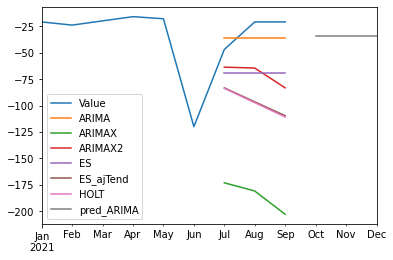

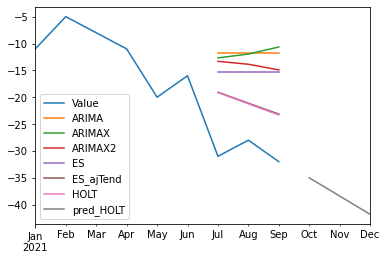

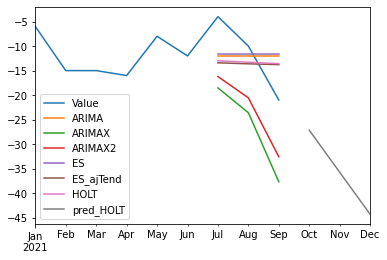

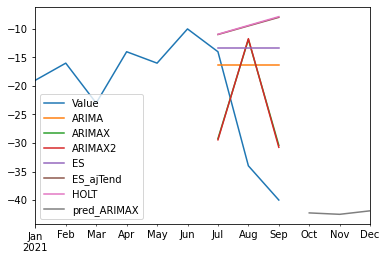

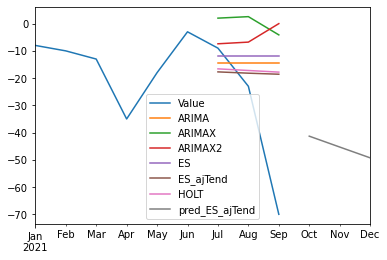

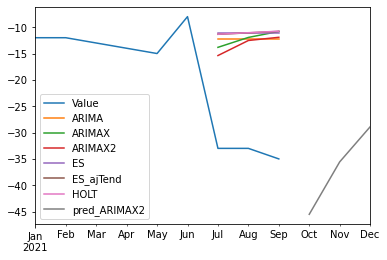

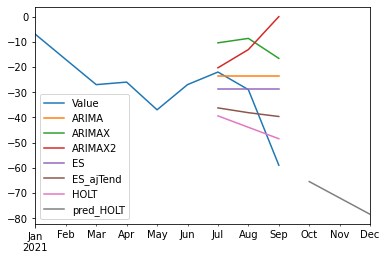

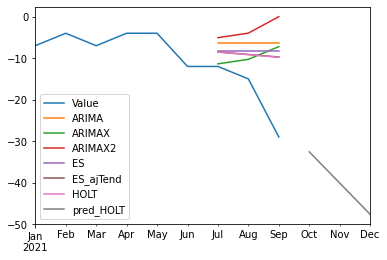

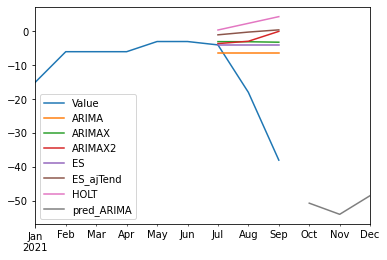

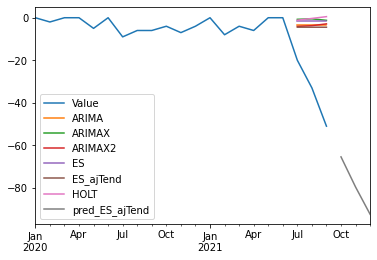

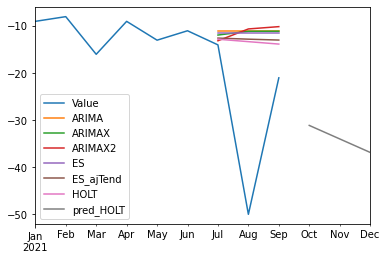

In [805]:
for key, row in ResPred[ResPred['pred']<=-100].iterrows():
    print(key)
    visualNodo(key)

# prediccion CONTACT RATE

# UNIFICAR RESULTADOS